<a href="https://colab.research.google.com/github/Shantnu-Talokar/ML_Lab_ShantnuTalokar/blob/main/ML_Practical6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
np.random.seed(42)
n = 200

data = {
    'num_visits': np.random.randint(1, 20, size=n),
    'time_spent': np.random.randint(1, 60, size=n),
    'age_group': np.random.choice(['18-25', '26-35', '36-45', '46+'], size=n),
    'product_category': np.random.choice(['Electronics', 'Clothing', 'Books', 'Home'], size=n),
    'avg_cart_value': np.round(np.random.uniform(10, 250, size=n), 2),
    'device_type': np.random.choice(['Mobile', 'Desktop'], size=n)
}

df = pd.DataFrame(data)

df['purchased'] = (
    (df['num_visits'] > 10).astype(int) +
    (df['time_spent'] > 30).astype(int) +
    (df['avg_cart_value'] > 120).astype(int)
)
df['purchased'] = (df['purchased'] >= 2).astype(int)

df.head()


,num_visits,time_spent,age_group,product_category,avg_cart_value,device_type,purchased
0,7,11,26-35,Books,55.15,Mobile,0
1,15,28,36-45,Home,121.29,Desktop,1
2,11,57,46+,Home,94.80,Mobile,1
3,8,25,18-25,Books,150.08,Mobile,0
4,7,50,18-25,Clothing,28.66,Desktop,0


In [3]:
df_encoded = pd.get_dummies(df, columns=['age_group', 'product_category', 'device_type'], drop_first=True)

X = df_encoded.drop('purchased', axis=1)
y = df_encoded['purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

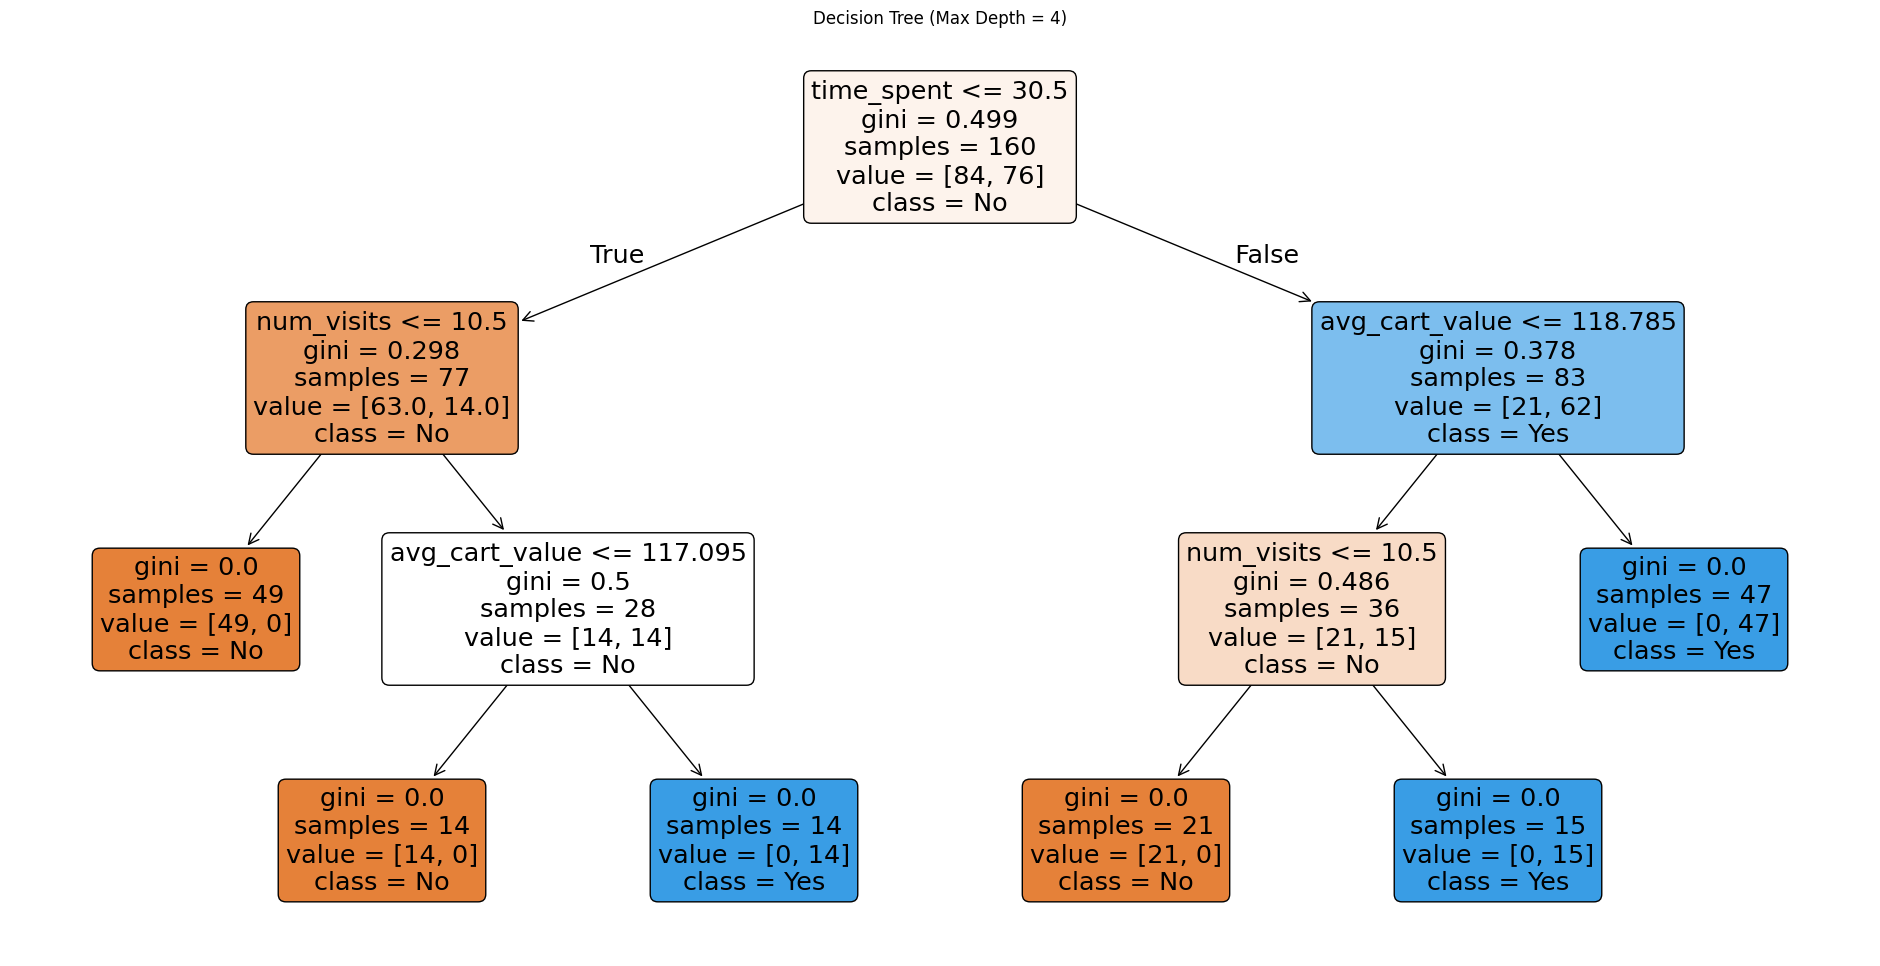

In [11]:
plt.figure(figsize=(24, 12))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title("Decision Tree (Max Depth = 4)")
plt.show()

✅ Accuracy: 1.0

📄 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



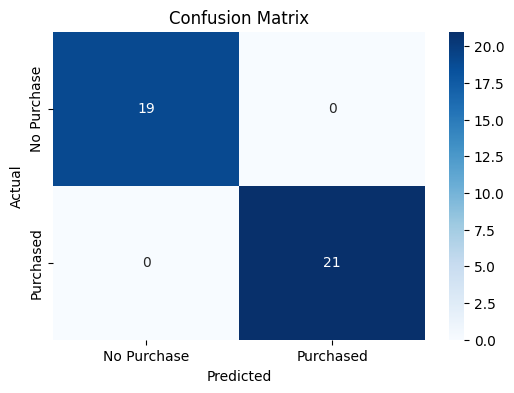

In [12]:
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))

# 🧊 Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Purchase', 'Purchased'], yticklabels=['No Purchase', 'Purchased'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
